In [1]:
'''
    Preprocessing the Daniel Shan Balico dataset and split into train, test, validation.
'''
import numpy as np
import pandas as pd
import shutil, time, os, requests, random, copy
import PIL
from PIL import Image
import matplotlib.pyplot as plt 
from tqdm import tqdm

In [2]:
dataframe = pd.read_csv('data/Daniel_Shan_Balico/labels.csv')
dataframe.info()
dataframe.head()

from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)
for train_val_index, test_index in sss.split(dataframe, dataframe['label']):
    train_val_set = dataframe.loc[train_val_index]
    test_set = dataframe.loc[test_index]

for train_index, val_index in sss.split(train_val_set, train_val_set['label']):
    train_set = dataframe.loc[train_index]
    val_set = dataframe.loc[val_index]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4000 non-null   int64 
 1   filename    4000 non-null   object
 2   label       4000 non-null   object
dtypes: int64(1), object(2)
memory usage: 93.9+ KB


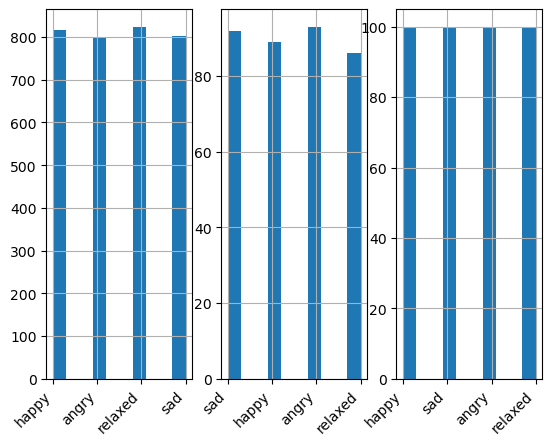

In [3]:
plt.subplot(1, 3, 1)
train_set['label'].hist()
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 3, 2)
val_set['label'].hist()
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 3, 3)
test_set['label'].hist()
plt.xticks(rotation=45, ha='right')

plt.show()

In [4]:
os.mkdir('data/Daniel_Shan_Balico/train')
os.mkdir('data/Daniel_Shan_Balico/test')
os.mkdir('data/Daniel_Shan_Balico/validation')
os.mkdir('data/Daniel_Shan_Balico/train/happy')
os.mkdir('data/Daniel_Shan_Balico/train/sad')
os.mkdir('data/Daniel_Shan_Balico/train/relaxed')
os.mkdir('data/Daniel_Shan_Balico/train/angry')
os.mkdir('data/Daniel_Shan_Balico/test/happy')
os.mkdir('data/Daniel_Shan_Balico/test/sad')
os.mkdir('data/Daniel_Shan_Balico/test/angry')
os.mkdir('data/Daniel_Shan_Balico/test/relaxed')
os.mkdir('data/Daniel_Shan_Balico/validation/happy')
os.mkdir('data/Daniel_Shan_Balico/validation/sad')
os.mkdir('data/Daniel_Shan_Balico/validation/angry')
os.mkdir('data/Daniel_Shan_Balico/validation/relaxed')

for index in tqdm(train_set.index):
    shutil.copyfile('data/Daniel_Shan_Balico/all_images/' + train_set['filename'][index], 
                    'data/Daniel_Shan_Balico/train/' + train_set['label'][index] + '/' + train_set['filename'][index])
for index in tqdm(val_set.index):
    shutil.copyfile('data/Daniel_Shan_Balico/all_images/' + val_set['filename'][index], 
                    'data/Daniel_Shan_Balico/validation/' + val_set['label'][index] + '/' + val_set['filename'][index])
for index in tqdm(test_set.index):
    shutil.copyfile('data/Daniel_Shan_Balico/all_images/' + test_set['filename'][index], 
                    'data/Daniel_Shan_Balico/test/' + test_set['label'][index] + '/' +  test_set['filename'][index])

100%|██████████| 400/400 [00:00<00:00, 18561.13it/s]
